# i. Perkenalan
>Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Nailina Farah

Batch : FTDS_RMT_28

Dataset : hotel.csv

Problem Statement : Perusahaan perhotelan bertujuan untuk mengurangi jumlah pemesanan kamar hotel yang dibatalkan oleh pelanggan. Diperlukan suatu model prediksi untuk membantu perusahaan ini dalam meramalkan pelanggan yang kemungkinan akan membatalkan pesanan, dengan menggunakan dataset yang tersedia.

Objective: Membuat model ANN dengan accuracy minimal 80% dalam memprediksi pembatalan kamar hotel oleh pelanggan.

# ii. Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [62]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pickle
import tensorflow as tf

!pip install phik
import phik

from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model
import pickle
from tensorflow.keras.models import load_model

# iii. Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# https://drive.google.com/file/d/1NtfLXInB0f0Gh8_50yvPjAt6X-XjioEo/view?usp=sharing

# ID file dari URL Google Drive
file_id = "1NtfLXInB0f0Gh8_50yvPjAt6X-XjioEo"

# URL unduhan CSV dari Google Drive
url = f"https://drive.google.com/uc?id={file_id}"

# Baca file CSV dan buat DataFrame
df_ori = pd.read_csv(url)

# Tampilkan DataFrame
print(df_ori)

      Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                   

In [4]:
# Duplicate data ori
df = df_ori.copy()
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [5]:
# show 10 data teratas
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [6]:
# show 10 data terakhir
df.tail(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36265,INN36266,2,0,1,3,Meal Plan 1,0,Room_Type 1,15,2018,5,30,Online,0,0,0,100.73,0,Not_Canceled
36266,INN36267,2,0,2,2,Meal Plan 1,0,Room_Type 2,8,2018,3,4,Online,0,0,0,85.96,1,Canceled
36267,INN36268,2,0,1,0,Not Selected,0,Room_Type 1,49,2018,7,11,Online,0,0,0,93.15,0,Canceled
36268,INN36269,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00,0,Canceled
36269,INN36270,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,2018,10,6,Online,0,0,0,216.00,0,Canceled
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [7]:
# Check Dataset 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Dataset terdiri dari 19 kolom, dengan 4 kolom object dan 13 kolom integer dan 1 kolom float.

In [8]:
# Check Dataset 2
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Saat sekilas dicek, tidak terdapat missing value.

In [9]:
# Check Dataset 3
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Berikut adalah deskripsi kolom yang bertipe integer dan float.

In [10]:
# Memilih hanya kolom-kolom numerik
numeric_data = df.select_dtypes(include=['int', 'float'])

# Menampilkan nilai skew untuk setiap kolom numerik
skewness = numeric_data.skew()

skewness

no_of_adults                            -0.333295
no_of_children                           4.710350
no_of_weekend_nights                     0.737616
no_of_week_nights                        1.599350
required_car_parking_space               5.413643
lead_time                                1.292492
arrival_year                            -1.669695
arrival_month                           -0.348229
arrival_date                             0.028809
repeated_guest                           6.002888
no_of_previous_cancellations            25.199876
no_of_previous_bookings_not_canceled    19.250191
avg_price_per_room                       0.667133
no_of_special_requests                   1.145081
dtype: float64

Dari nilai skew pada kolom bertipe integer dan float terlihat ada beberapa yang memiliki skew ekstrem (> 1,5 atau < - 1,5)

# iv. Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

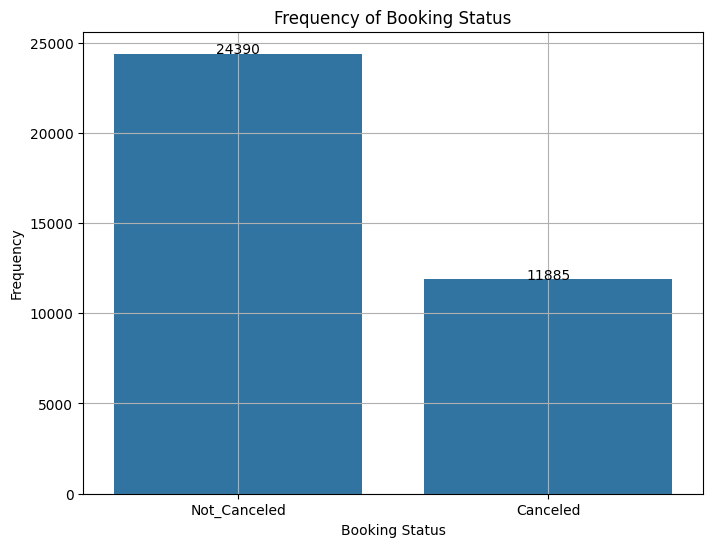

In [11]:
# FREKUENSI DATA TARGET

# Hitung frekuensi masing-masing nilai dalam kolom 'booking_status'
booking_status_counts = df_ori['booking_status'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x='booking_status', data=df_ori)
plt.title('Frequency of Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Frequency')

# Annotate nilai frekuensi di atas setiap bar
for i, count in enumerate(booking_status_counts):
    plt.text(i, count + 20, str(count), ha='center')

plt.grid(True)
plt.show()

Terlihat dari visualisasi bahwa dari perusahaan hotel ini lebih banyak yang tidak melakukan pembatalan yaitu berjumlah 24.390 dibandingkan yang melakukan pembatalan yaitu 11.885. Namun, angka tersebut masih perlu diturunkan agar hotel semakin baik dan keuntungan semakin besar.

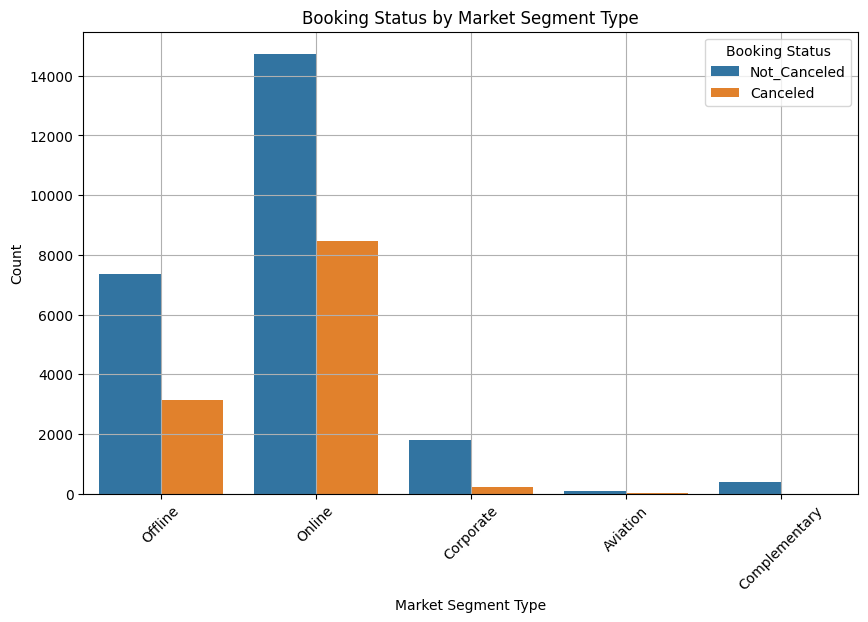

In [12]:
# BOOKING STATUS BERDASARKAN TIPE MARKET SEGMENT

plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment_type', hue='booking_status', data=df_ori)
plt.title('Booking Status by Market Segment Type')
plt.xlabel('Market Segment Type')
plt.ylabel('Count')
plt.legend(title='Booking Status', loc='upper right')
plt.xticks(rotation=45)  # Rotasi label x agar lebih mudah dibaca
plt.grid(True)
plt.show()

Jika dilihat berdasarkan tipe market segment, yang paling banyak melakukan pembatalan berasal dari online dan yang paling sedikit melakukan pembatalan yaitu aviation dan complementary.

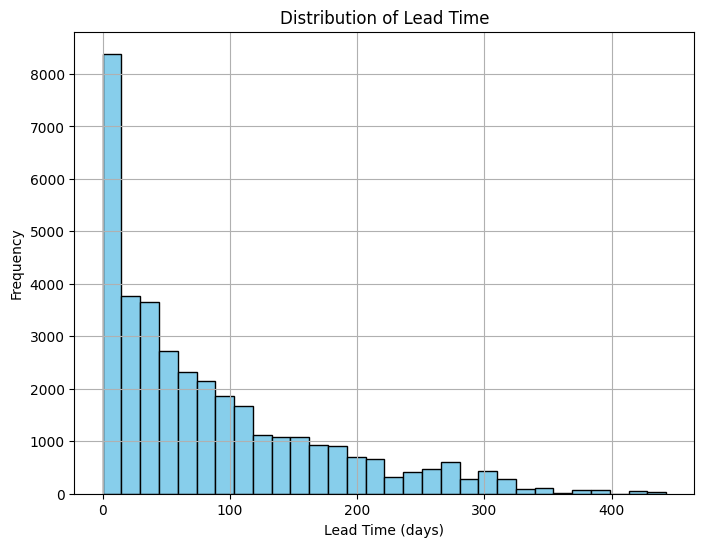

In [13]:
# DISTRIBUSI LEAD TIME
plt.figure(figsize=(8, 6))
plt.hist(df_ori['lead_time'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Dari visualisasi tersebut terjadi frekuensi sangat tinggi pada lead time 0. Puncak pada lead time 0 menunjukkan bahwa ada sejumlah besar pemesanan yang dilakukan pada hari kedatangan atau sangat dekat dengan hari kedatangan. Ini mungkin menunjukkan adanya pemesanan mendadak atau pemesanan last-minute oleh pelanggan.

# v. Feature Engineering
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [14]:
# membuat random_state agar selalu sama
random_state = 3

## Cek Duplikasi dan Drop Kolom Tidak Diperlukan

In [15]:
# cek duplikasi sebelum drop duplikasi
df.duplicated().sum()

0

Duplikasi pada dataset tidak ada, sehingga tidak diperlukan drop duplikasi.

In [16]:
df = df.drop('Booking_ID', axis = 1)

In [17]:
df.shape

(36275, 18)

Karena feature booking ID tidak memberikan informasi apapun maka didrop. Setelah di drop, data menjadi 36275 dengan 18 kolom.

In [20]:
# Mengganti nilai 'not_canceled' dengan 0 dan 'canceled' dengan 1 di kolom 'booking_status'
df['booking_status'] = df['booking_status'].replace({'Not_Canceled': 0, 'Canceled': 1})

# Mengubah tipe data kolom 'booking_status' menjadi integer
df['booking_status'] = df['booking_status'].astype(int)

# Menampilkan DataFrame setelah penggantian nilai
print(df)

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

      type_of_meal_plan  required_car_p

## Split Features (X) dan target (y)

In [21]:
# Define features (X) dan target(Y) dimana X adalah features selain booking_status, karena booking_status menjadi target.

X = df.drop('booking_status', axis = 1)
y = df['booking_status']
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0


In [22]:
# melihat shape dari features
X.shape

(36275, 17)

Setelah membuat booking_status menjadi target. Features (X) terdiri dari 17 kolom dengan 36.275 data.

## Split Train and Test set

In [23]:
# Splitting between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=random_state)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (26208, 17)
Val Size   :  (4625, 17)
Test Size  :  (5442, 17)


Pembagian dataset menjadi:
- Train Size: 26.208 data
- Val Size: 4.625 data
- Test Size: 5.442 data

Kemudian akan dilanjutkan dengan handling missing value.

## Handling Missing Value

In [24]:
# Check Missing Values on X_train

X_train.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

In [25]:
# Check Missing Values on X_val

X_val.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

In [26]:
# Check Missing Values on X_test

X_test.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

In [27]:
# melihat missing value y_train
y_train.isnull().sum()

0

In [28]:
# melihat missing value y_test
y_test.isnull().sum()

0

In [29]:
# melihat missing value y_val
y_val.isnull().sum()

0

Tidak terdapat missing value dari semua bagian. Maka akan dilanjutkan dengan handling outlier pada kolom numerik di X_train saja.

## Handling Outlier

In [30]:
# Pilih kolom-kolom yang akan dihandling outlier
selected_columns = ['lead_time', 'avg_price_per_room']

# Hitung skewness untuk setiap kolom yang dipilih
skewness = X_train[selected_columns].skew()

# Tampilkan hasil
print(skewness)

lead_time             1.298107
avg_price_per_room    0.667959
dtype: float64


Karena lead_time skew biasa, maka akan dilakukan handling outlier. Untuk kolom lainnya tidak dilakukan handling outlier karena valuenya alami seperti itu.

In [ ]:
# KOLOM SKEW BIASA
# Fungsi untuk mengganti nilai outlier dengan median
def replace_outliers_with_median(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    median = np.median(data)
    data = np.where((data < lower_bound) | (data > upper_bound), median, data)
    return data

# Loop melalui kolom-kolom yang perlu dicapping dengan median
columns_to_cap_with_median = ['lead_time', 'avg_price_per_room']
for col in columns_to_cap_with_median:
    X_train[col] = replace_outliers_with_median(X_train[col])

# Tampilkan DataFrame X_train setelah penggantian outlier
print(X_train)

In [32]:
# Cek kembali outlier
# Pilih kolom-kolom yang akan dihandling outlier
selected_columns = ['lead_time', 'avg_price_per_room']

# Hitung skewness untuk setiap kolom yang dipilih
skewness = X_train[selected_columns].skew()

# Tampilkan hasil
print(skewness)

lead_time             1.099287
avg_price_per_room    0.512292
dtype: float64


Ternyata setelah dihandle outlier, nilai skew berubah mendekati normal.

In [33]:
# cek shape setelah handling outlier
print('X Train Size :', X_train.shape)
print('X Test Size :', X_test.shape)
print('X val Size :', X_val.shape)
print('y Train Size :', y_train.shape)
print('y Test Size :', y_test.shape)
print('y val Size :', y_val.shape)

X Train Size : (26208, 17)
X Test Size : (5442, 17)
X val Size : (4625, 17)
y Train Size : (26208,)
y Test Size : (5442,)
y val Size : (4625,)


Shape setiap bagian tetap sama karena tidak ada yang didrop.

## Feature Selection

Uji korelasi menggunakan phik karena terdapat kolom numerik dan kategorik.

In [34]:
# Menggabungkan X_train dengan y_train untuk menghitung korelasi
train_set_fs = pd.concat([X_train, y_train], axis=1)

# Menyatakan tipe data sebelum menjalankan phik correlation
train_types_fs = {
    "no_of_adults": "interval",
    "no_of_children": "interval",
    "no_of_weekend_nights": "interval",
    "no_of_week_nights": "interval",
    "lead_time": "interval",
    "no_of_previous_cancellations": "interval",
    "no_of_previous_bookings_not_canceled": "interval",
    "required_car_parking_space": "categorical",
    "arrival_date": "categorical",
    "market_segment_type": "categorical",
    "repeated_guest": "categorical",
    "no_of_special_requests": "categorical",
    "type_of_meal_plan": "ordinal",
    "room_type_reserved": "ordinal",
    "arrival_year": "ordinal",
    "arrival_month": "ordinal"
}

# Memilih kolom interval yang akan digunakan untuk menghitung korelasi phi-k
interval_cols = [col for col, v in train_types_fs.items() if v == 'interval']

# Menghitung korelasi phi-k
phik_corr = train_set_fs.phik_matrix(interval_cols=interval_cols)['booking_status']
print(phik_corr)

no_of_adults                            0.082819
no_of_children                          0.031309
no_of_weekend_nights                    0.094939
no_of_week_nights                       0.143246
type_of_meal_plan                       0.131961
required_car_parking_space              0.138914
room_type_reserved                      0.036909
lead_time                               0.515686
arrival_year                            0.279347
arrival_month                           0.252313
arrival_date                            0.096753
market_segment_type                     0.122820
repeated_guest                          0.167638
no_of_previous_cancellations            0.058171
no_of_previous_bookings_not_canceled    0.072480
avg_price_per_room                      0.499904
no_of_special_requests                  0.353917
booking_status                          1.000000
Name: booking_status, dtype: float64


Dari korelasi phik tersebut, saya akan menginput feature yang hanya memiliki korelasi > 0.1, yaitu:
- no_of_week_nights                       0.143246
- type_of_meal_plan                       0.131961
- required_car_parking_space              0.138914
- lead_time                               0.515686
- arrival_year                            0.279347
- arrival_month                           0.252313
- market_segment_type                     0.122820
- repeated_guest                          0.167638
- avg_price_per_room                      0.499904
- no_of_special_requests                  0.353917

Sehingga kolom lain akan didrop

In [35]:
selected_columns = [
    'no_of_week_nights',
    'type_of_meal_plan',
    'required_car_parking_space',
    'lead_time',
    'arrival_year',
    'arrival_month',
    'market_segment_type',
    'repeated_guest',
    'avg_price_per_room',
    'no_of_special_requests'
]

X_train = X_train[selected_columns]
X_val = X_val[selected_columns]
X_test = X_test[selected_columns]

In [36]:
# cek shape setelah feature selection
print('X Train Size :', X_train.shape)
print('X Test Size :', X_test.shape)
print('X val Size :', X_val.shape)
print('y Train Size :', y_train.shape)
print('y Test Size :', y_test.shape)
print('y val Size :', y_val.shape)

X Train Size : (26208, 10)
X Test Size : (5442, 10)
X val Size : (4625, 10)
y Train Size : (26208,)
y Test Size : (5442,)
y val Size : (4625,)


Setelah feature selection, jumlah feature menjadi 10 feature saja.

## Cardinality Check

In [37]:
# Cek unique value pada kolom kategorik

print("Unique Value pada kolom no_of_week_nights adalah:", df['no_of_week_nights'].unique())
print("Unique Value pada kolom type_of_meal_plan adalah:", df['type_of_meal_plan'].unique())
print("Unique Value pada kolom required_car_parking_space adalah:", df['required_car_parking_space'].unique())
print("Unique Value pada kolom arrival_year adalah:", df['arrival_year'].unique())
print("Unique Value pada kolom arrival_month adalah:", df['arrival_month'].unique())
print("Unique Value pada kolom market_segment_type adalah:", df['market_segment_type'].unique())
print("Unique Value pada kolom repeated_guest adalah:", df['repeated_guest'].unique())
print("Unique Value pada kolom no_of_special_requests adalah:", df['no_of_special_requests'].unique())

Unique Value pada kolom no_of_week_nights adalah: [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
Unique Value pada kolom type_of_meal_plan adalah: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
Unique Value pada kolom required_car_parking_space adalah: [0 1]
Unique Value pada kolom arrival_year adalah: [2017 2018]
Unique Value pada kolom arrival_month adalah: [10 11  2  5  4  9 12  7  6  8  3  1]
Unique Value pada kolom market_segment_type adalah: ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
Unique Value pada kolom repeated_guest adalah: [0 1]
Unique Value pada kolom no_of_special_requests adalah: [0 1 3 2 4 5]


Dari kolom-kolom tersebut, nilai yang sudah sesuai valuenya angka dan tidaka perlu handling cardinality adalah:
- required_car_parking_space
- no_of_special_requests

yang memerlukan encoding antara lain:
1. OneHotEncoder
  - repeated_guest
  - market_segment_type
2. OrdinalEncoder
  - no_of_week_nights
  - type_of_meal_plan
  - arrival_year
  - arrival_month

Namun, sebelumnya pada no_of_week_nights dan arrival_month akan dihandling cardinalitynya agar tidak high cardinality.

In [38]:
# Membuat dictionary untuk mapping
no_of_week_nights_mapping = {0: '< 10', 1: '< 10', 2: '< 10', 3: '< 10', 4: '< 10', 5: '< 10',
                             6: '< 10', 7: '< 10', 8: '< 10', 9: '< 10', 10: '>10', 11: '>10',
                             12: '>10', 13: '>10', 14: '>10', 15: '>10', 17: '>10', 16: '>10'}
arrival_month_mapping = {1: 'Q1', 2: 'Q1', 3: 'Q1', 4: 'Q1',
                         5: 'Q2', 6: 'Q2', 7: 'Q2', 8: 'Q2',
                         9: 'Q3', 10: 'Q3', 11: 'Q3', 12: 'Q3'}

# Menggunakan mapping untuk mengubah nilai pada kolom
X_train['no_of_week_nights'] = X_train['no_of_week_nights'].map(no_of_week_nights_mapping)
X_train['arrival_month'] = X_train['arrival_month'].map(arrival_month_mapping)
X_test['no_of_week_nights'] = X_test['no_of_week_nights'].map(no_of_week_nights_mapping)
X_test['arrival_month'] = X_test['arrival_month'].map(arrival_month_mapping)
X_val['no_of_week_nights'] = X_val['no_of_week_nights'].map(no_of_week_nights_mapping)
X_val['arrival_month'] = X_val['arrival_month'].map(arrival_month_mapping)

# Melihat hasil perubahan
print("Unique Value pada kolom no_of_week_nights setelah diubah:")
print(X_train['no_of_week_nights'].unique())
print("\nUnique Value pada kolom arrival_month setelah diubah:")
print(X_train['arrival_month'].unique())

Unique Value pada kolom no_of_week_nights setelah diubah:
['< 10' '>10']

Unique Value pada kolom arrival_month setelah diubah:
['Q2' 'Q3' 'Q1']


Kolom yang dipilih sudah dilakukan handling cardinality

## Split numerical columns and categorical columns (Pipeline)

Saya melakukan 3 split karena pada feature kategorik akan dibedakan encodingnya.

In [39]:
# define numerik dan kategorik features dari dataframe x_train yang sudah dihandle outlier berdasarkan tipe kolom
# define numerik di x_train
num_col = ['lead_time', 'avg_price_per_room']

# define kategorikal nominal
cat_col_n = ['market_segment_type', 'repeated_guest']

# define kategorikal ordinal
cat_col_o = ['no_of_week_nights', 'type_of_meal_plan', 'arrival_year', 'arrival_month']

# print
print(f'numerical columns= {num_col}')
print(f'categorical columns= {cat_col_n}')
print(f'ordinal columns= {cat_col_o}')

numerical columns= ['lead_time', 'avg_price_per_room']
categorical columns= ['market_segment_type', 'repeated_guest']
ordinal columns= ['no_of_week_nights', 'type_of_meal_plan', 'arrival_year', 'arrival_month']


Saya menggunakan standard scaler karena feature numerik telah dihandling outliernya.

In [40]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Inisialisasi OrdinalEncoder untuk kategori ordinal
ordinal_encoder = OrdinalEncoder()

# Inisialisasi OneHotEncoder untuk kategori nominal
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# Menggabungkan scaler dan encoder dalam ColumnTransformer
final_pipeline = ColumnTransformer(
    transformers=[
        ('num', scaler, num_col),  # Melakukan scaling pada kolom numerik
        ('ord', ordinal_encoder, cat_col_o),  # Melakukan encoding ordinal pada kolom ordinal
        ('nom', onehot_encoder, cat_col_n),  # Melakukan one-hot encoding pada kolom nominal
    ],
    remainder='passthrough'  # Biarkan fitur-fitur lainnya tanpa perubahan
)

Pipeline Preprocess siap dimasukkan dalam model.

In [41]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape

(26208, 15)

# vi. ANN Training - Sequential API

## vi.1. Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [42]:
# Clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [43]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(16,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(15,)))
model_sequential.add(Dense(8,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                256       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


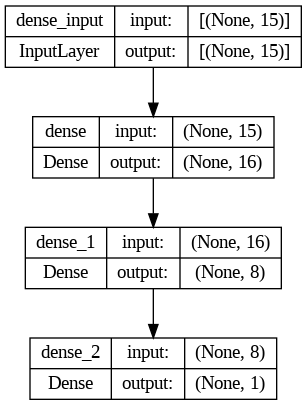

In [44]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

## vi.2. Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [45]:
# Train the model

%%time
history_seq = model_sequential.fit(X_train,
                                   y_train,
                                   epochs=21,
                                   validation_data=(X_val, y_val),
                                   batch_size=32)

Epoch 1/21
819/819 [==============================] - 9s 4ms/step - loss: 0.5150 - accuracy: 0.7399 - val_loss: 0.4230 - val_accuracy: 0.8089
Epoch 2/21
819/819 [==============================] - 2s 3ms/step - loss: 0.4531 - accuracy: 0.7926 - val_loss: 0.4140 - val_accuracy: 0.8151
Epoch 3/21
819/819 [==============================] - 3s 4ms/step - loss: 0.4447 - accuracy: 0.7991 - val_loss: 0.4112 - val_accuracy: 0.8173
Epoch 4/21
819/819 [==============================] - 3s 3ms/step - loss: 0.4392 - accuracy: 0.8012 - val_loss: 0.4123 - val_accuracy: 0.8195
Epoch 5/21
819/819 [==============================] - 2s 3ms/step - loss: 0.4345 - accuracy: 0.8044 - val_loss: 0.4037 - val_accuracy: 0.8326
Epoch 6/21
819/819 [==============================] - 3s 3ms/step - loss: 0.4288 - accuracy: 0.8080 - val_loss: 0.4030 - val_accuracy: 0.8311
Epoch 7/21
819/819 [==============================] - 2s 3ms/step - loss: 0.4243 - accuracy: 0.8092 - val_loss: 0.3998 - val_accuracy: 0.8322
Epoch 

## vi.3. Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis secara detail terkait dengan hasil pada model dan tuliskan hasil analisisnya.

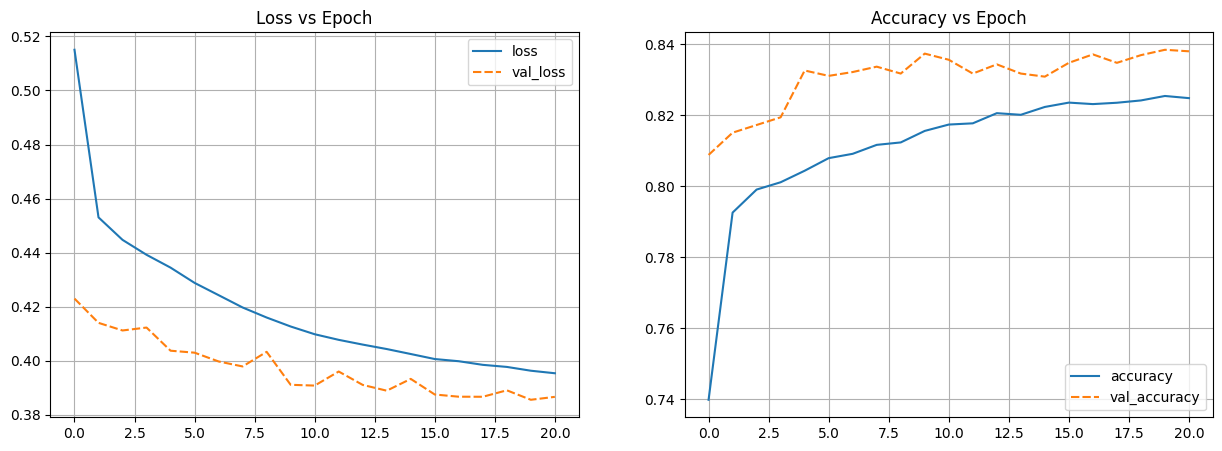

In [46]:
# Plot training results

history_seq_df = pd.DataFrame(history_seq.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_seq_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Epoch')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_seq_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Epoch')
plt.show()

In [47]:
# Melakukan evaluasi pada data test
loss, accuracy = model_sequential.evaluate(X_test, y_test)

# Menampilkan hasil evaluasi
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

171/171 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8326
Test Loss: 0.38646742701530457
Test Accuracy: 0.8325983285903931


171/171 [==============================] - 0s 2ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      3656
           1       0.76      0.71      0.74      1786

    accuracy                           0.83      5442
   macro avg       0.81      0.80      0.81      5442
weighted avg       0.83      0.83      0.83      5442
 



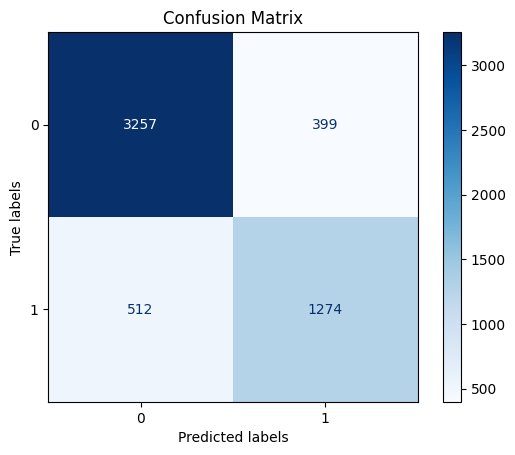

In [48]:
# Prediksi kelas menggunakan model
y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0) # kalo biner
# y_pred_class = np.argmax(y_pred_prob, axis=-1) # untuk multiclass

# Menampilkan classification report
print('Classification Report : \n', classification_report(y_test, y_pred_seq), '\n')

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_seq)

# Menampilkan confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# vii. ANN Training - Functional API

## vii.1. Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [51]:
# Clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [52]:
# Create functional model

input_layer = Input(shape=(15,))
hidden_layer_1 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)) (input_layer)
hidden_layer_2 = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)) (hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)) (concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 15)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 16)                   256       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 8)                    136       ['dense[0][0]']               
                                                                                                  
 concatenate (Concatenate)   (None, 23)                   0         ['input_1[0][0]',             
                                                                     'dense_1[0][0]']         

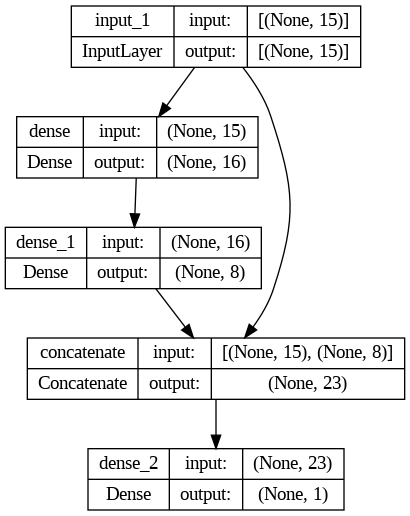

In [53]:
# Plot layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

## vii.2. Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [54]:
# Train the model

%%time
history_func = model_functional.fit(X_train,
                                    y_train,
                                    epochs=21,
                                    validation_data=(X_val, y_val),
                                    batch_size=32)

Epoch 1/21
819/819 [==============================] - 4s 4ms/step - loss: 0.5512 - accuracy: 0.7106 - val_loss: 0.4212 - val_accuracy: 0.8132
Epoch 2/21
819/819 [==============================] - 3s 3ms/step - loss: 0.4481 - accuracy: 0.7914 - val_loss: 0.4135 - val_accuracy: 0.8151
Epoch 3/21
819/819 [==============================] - 2s 3ms/step - loss: 0.4372 - accuracy: 0.7959 - val_loss: 0.4102 - val_accuracy: 0.8205
Epoch 4/21
819/819 [==============================] - 3s 3ms/step - loss: 0.4300 - accuracy: 0.7999 - val_loss: 0.4087 - val_accuracy: 0.8203
Epoch 5/21
819/819 [==============================] - 3s 3ms/step - loss: 0.4244 - accuracy: 0.8044 - val_loss: 0.4035 - val_accuracy: 0.8229
Epoch 6/21
819/819 [==============================] - 3s 3ms/step - loss: 0.4191 - accuracy: 0.8099 - val_loss: 0.4021 - val_accuracy: 0.8270
Epoch 7/21
819/819 [==============================] - 3s 3ms/step - loss: 0.4163 - accuracy: 0.8114 - val_loss: 0.3983 - val_accuracy: 0.8318
Epoch 

## vii.3. Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis secara detail terkait dengan hasil pada model dan tuliskan hasil analisisnya.

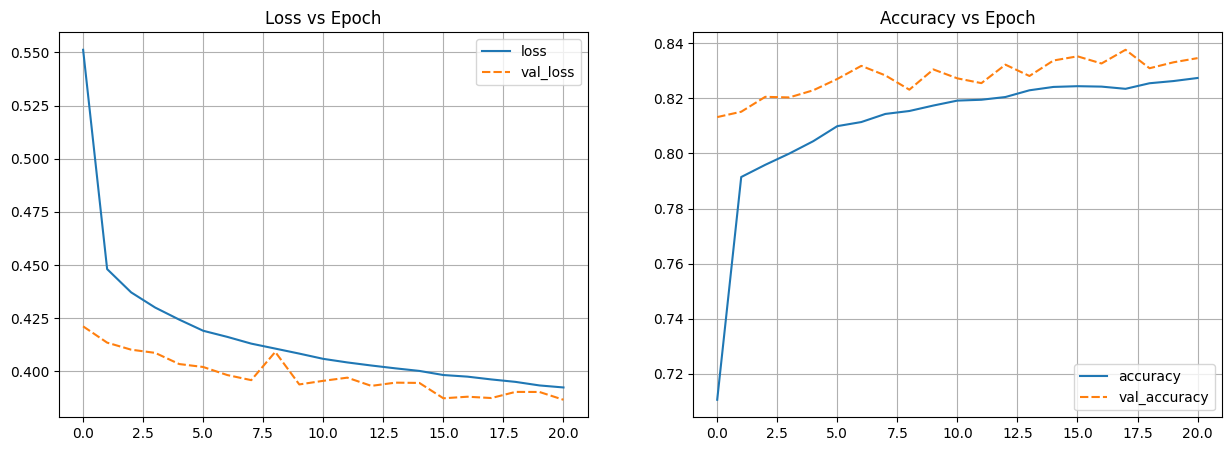

In [55]:
# Plot training results

history_func_df = pd.DataFrame(history_func.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_func_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Epoch')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_func_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Epoch')
plt.show()

In [56]:
# Melakukan evaluasi pada data test
loss, accuracy = model_functional.evaluate(X_test, y_test)

# Menampilkan hasil evaluasi
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

171/171 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8265
Test Loss: 0.39239221811294556
Test Accuracy: 0.8265343904495239


171/171 [==============================] - 1s 4ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      3656
           1       0.75      0.71      0.73      1786

    accuracy                           0.83      5442
   macro avg       0.81      0.80      0.80      5442
weighted avg       0.82      0.83      0.83      5442
 



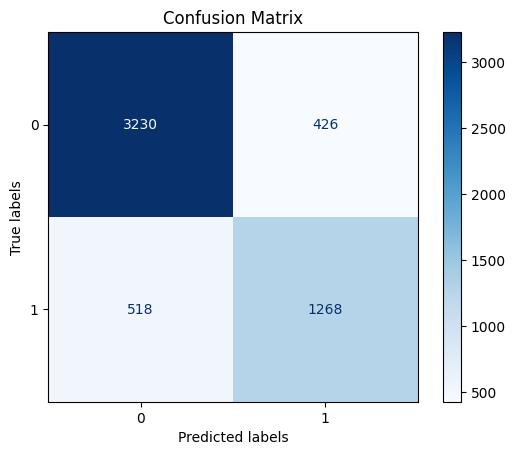

In [57]:
# Prediksi kelas menggunakan model
y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0) # kalo biner
# y_pred_class = np.argmax(y_pred_prob, axis=-1) # untuk multiclass

# Menampilkan classification report
print('Classification Report : \n', classification_report(y_test, y_pred_func), '\n')

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_func)

# Menampilkan confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# viii. Model Saving
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. Pilihlah 1 arsitektur ANN yang terbaik berdasarkan hasil evaluasi sebelumnya. Nyatakan secara jelas arsitektur mana yang akan dipakai sebagai model terbaik (Sequential API atau Functional API).

In [58]:
with open('pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

In [59]:
# Freeze model sequential

model_sequential.trainable = False
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                256       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 401 (1.57 KB)
_________________________________________________________________


In [60]:
# Save file model karena model yang lebih baik
model_sequential.save('model.keras')

# ix. Model Inference
> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set, val-set, ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled. Model Inference harus berada pada notebook yang berbeda dari notebook yang dipakai untuk pembuatan model.

In [63]:
# Memuat kembali transformer
with open('pipeline.pkl', 'rb') as file:
    final_pipeline = pickle.load(file)

# Memuat kembali model
model_sequential = load_model('model.keras')

In [72]:
# Data yang ingin Anda prediksi
data_inf = {
    'no_of_week_nights': 2,
    'type_of_meal_plan': 'Meal Plan 1',
    'required_car_parking_space': 0,
    'arrival_year': 2017,
    'arrival_month': 10,
    'market_segment_type': 'Offline',
    'repeated_guest': 0,
    'no_of_special_requests': 0,
    'lead_time': 224,
    'avg_price_per_room': 65
}

data_inf = pd.DataFrame([data_inf])

# Melakukan transformasi pada data
transformed_data = final_pipeline.transform(data_inf)

# Melakukan prediksi pada data yang telah di-transformasi
prediction = model_sequential.predict(transformed_data)
if prediction[0] == 1:
    print("Prediksi menunjukkan kemungkinan terjadinya pembatalan booking hotel.")
else:
    print("Prediksi menunjukkan kemungkinan tidak terjadinya pembatalan booking hotel.")

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# xii. Pengambilan Kesimpulan
> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

**Kesimpulan Secara Keseluruhan:**
model yang terbaik adalah sequencial

